In [4]:


import os
import argparse
import datetime as dt
import json
import socket
import sys
import time
import traceback

import astropy.units as u
import numpy as np
import requests
from cheta import fetch_sci as fetch
from cxotime import CxoTime
from chandratime import cxctime_to_datetime
from Chandra.Time import DateTime as cxcDateTime

from heartbeat import are_we_in_comm, timestamp_string, force_timeout, TimeoutException
from goes_proxy import get_goes_proxy
from monitor_comms import send_slack_message
from chandratime import convert_to_doy, timedelta_formatter

import datetime as dt

from matplotlib import pyplot as plt

In [19]:
two_days_ago = dt.datetime.now() - dt.timedelta(days=2)
pull_telem_from = convert_to_doy(two_days_ago)

In [26]:
fetch.data_source.set('maude allow_subset=False')

telem_msidlist = ['2P15VAVL', '2C15PALV', '2N15VAVL', '2C15NALV',]



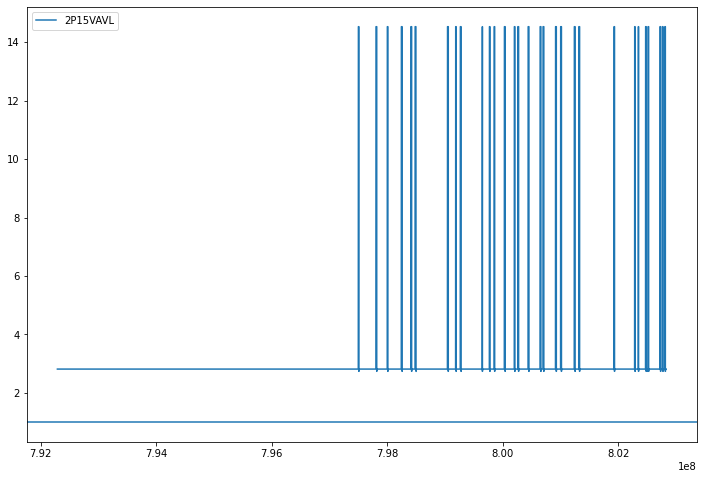

In [28]:
# First anomaly
# telem = fetch.MSIDset(telem_msidlist, start='2020:235', stop='2020:242')

# two days ago
telem = fetch.MSIDset(telem_msidlist, start=pull_telem_from)

telem = fetch.MSIDset(telem_msidlist, start='2023:040', stop='2023:170')

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(telem['2P15VAVL'].times, telem['2P15VAVL'].vals, label='2P15VAVL')
# ax.plot(telem['2C15PALV'].times, telem['2C15PALV'].vals, label='2C15PALV')
ax.axhline(1.0)
ax.legend()